### Praktische Prüfungsleistung
**Studiengang:** Zertifikat Data Analytics (DA) <br>
**Semester:** SoSe 2022 <br>
**Veranstaltung:** Praktische Datenanalyse <br>
**Matrikelnummer:** 3046496 <br>
**Name, Vorname:** Schiffmann, Christian <br>
**Datum:** 13.09.2022 <br>

<hr style="border:1px solid gray">

## Inhaltsverzeichnis:

1. [Einleitung](#intro)<br>
    a. [Einführung in die Datenanalyse](#introduction1) <br>
    b. [Aufbau und Ablauf der Datenanalyse](#introduction2)<br>
    c. [Ziel-Kennzahlen](#introduction3)<br>
    d. [Systemanforderungen](#introduction4)<br>
2. [Explorative Datenanalyse](#EDA)<br>
    a. [Erläuterung des Datensets](#EDA1) <br>
    b. [Erstsichtung des Datensets](#EDA2) <br>
3. [Datenbereinigung](#Cleaning)<br>
4. [Modellierung](#ML)<br>
5. [Modelloptimierungen und Vergleiche der Modelle](#Optimization)<br>
6. [Ergebnispräsentation](#Present)<br>
7. [Zusammenfassung und Ausblick](#Summary)<br>

<hr style="border:1px solid gray">

## 1. Einleitung <a name="introduction"></a>

### 1a Einführung in die Datenanalyse <a name="introduction1"></a>

### 1b Aufbau und Ablauf der Datenanalyse <a name="introduction2"></a>

### 1c Ziel-Kennzahlen <a name="introduction3"></a>

### 1d Systemanforderungen <a name="introduction4"></a>

Für die Datenanalyse werden eine Reihe von Libraries und Packages auf der Basis von Python genutzt, die die Analyse vereinfachen. Anbei eine kurze Aufführung der verwendeten Packages, Versionsnummern und eine kurze Beschreibung des Verwendungszweckes.

| Package  | Versionsnummer | Zweck |
|:--|:-:|:--|
| [Pandas](https://pandas.pydata.org/docs/) | 1.3.4 | Grundlegendes Package zur Manipulation und Transformation der Datensets |
| [Seaborn](https://seaborn.pydata.org/) | 0.11.2  | Package basierend auf Matplotlib für schnelle Visualisierungen von Daten  |
| [NumPy](https://numpy.org/) | 1.20.3 | Python-Bibliothek, die ein mehrdimensionales Array-Objekt, verschiedene abgeleitete Objekte (z. B. maskierte Arrays und Matrizen) und eine Reihe von Routinen für schnelle Operationen auf Arrays bereitstellt |
| [Matplotlib](https://matplotlib.org/) | 3.4.3 | Matplotlib ist eine umfassende Bibliothek zur Erstellung statischer, animierter und interaktiver Visualisierungen in Python |
| [Scipy](https://www.scipy.org/) | 1.7.1 | Das SciPy-Ökosystem umfasst allgemeine und spezielle Tools für die Datenverwaltung und -berechnung, produktive Experimente und Hochleistungsberechnungen |
| [Sklearn](https://scikit-learn.org/stable/) | 0.24.2 | Einfache und effiziente Tools für die prädiktive Datenanalyse |
| [Geopandas](https://geopandas.org/en/stable/) | 0.9.0 | GeoPandas ist ein Open-Source-Projekt, das die Arbeit mit Geodaten in Python erleichtert |


Die genannten Packeges werden nun in die Umgebung geladen:

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

from scipy import stats
import scipy

import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

import geopandas as gpd
import plotly.express as px
import dash

# Import sci-kit learn functions for modelling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import sklearn

print('Sklearn:',sklearn.__version__)
print('Scipy:',scipy.__version__)
print('Matplotlib:',matplotlib.__version__)
print('NumPy:',np.__version__)
print('Seaborn:',sns.__version__)
print('Pandas:',pd.__version__)
print('Geopandas:',gpd.__version__)

PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


Sklearn: 0.24.2
Scipy: 1.7.1
Matplotlib: 3.4.3
NumPy: 1.20.3
Seaborn: 0.11.2
Pandas: 1.3.4
Geopandas: 0.9.0


<hr style="border:1px solid gray">

## 2. Explorative Datenanalyse <a name="EDA"></a>

### 2a Erläuterung des Datensets <a name="EDA1"></a>

Zur Datenanalyse und Training des Mehrklassenklassifizierungsmodelles haben wir zwei Datensets zur Verfügung. Ein Trainingsset und ein Testset. Beide Dateien sind im csv Format vorhanden und befinden sich im Ordner ./src/.

### 2b Erstsichtung des Datensets <a name="EDA2"></a>

Als ersten Schritt laden wir die Datensets und verschaffen uns einen Überblick über die Spalten, Größe und Zusammensetzung des Datensets.

In [2]:
col = sns.choose_colorbrewer_palette('diverging');

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

In [3]:
df = pd.read_csv("data\hotel_bookings.csv")
print('Umfang Datensatz: ',df.shape, '\n')

Umfang Datensatz:  (119390, 32) 



In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Darstellung der Verteilungen aller Variablen

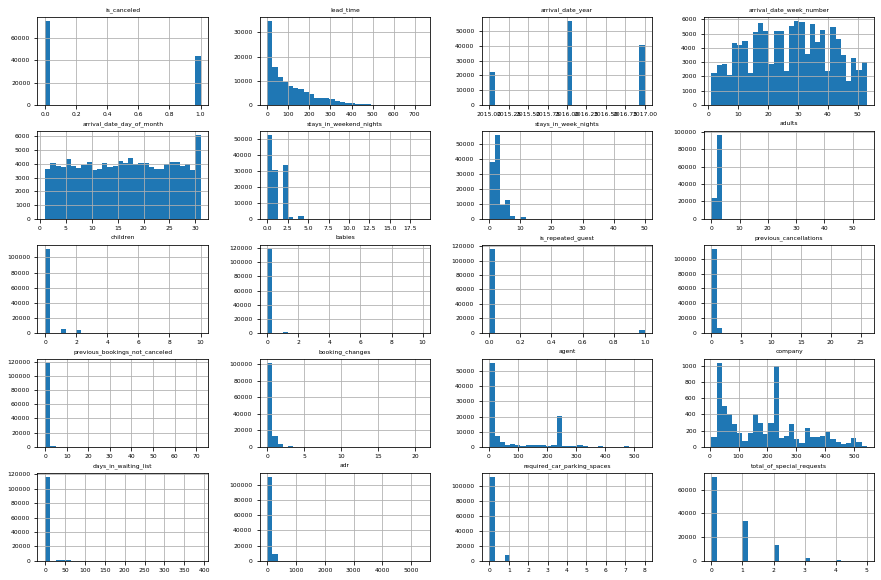

In [7]:

params = {'axes.titlesize':'6',
          'xtick.labelsize':'6',
          'ytick.labelsize':'6'}

matplotlib.rcParams.update(params)
df.hist(bins=30, figsize=(15, 10))
plt.show()

Überprüfung des Datensatzes auf fehlende Werte (missing values). Zu diesem Zwecke wird die .isnull() Funktion genutzt
welche alle Null-Werte im Dataframe zählt. Diese werden anschließend Zeilenweise mit .sum() aufsummiert.

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
columns_isnull = df[['children','country','agent','company']]
columns_isnull.head()
# Using pandas.unique() to unique values in multiple columns
Unique_Children = pd.unique(df['children'])
Unique_Country = pd.unique(df['country'])
Unique_Agent = pd.unique(df['agent'])
Unique_Company = pd.unique(df['company'])
print("Werte Children:")
print(Unique_Children)
print("---------------------------------------------------------------------------------------")
print("Werte Country:")
print(Unique_Country)
print("---------------------------------------------------------------------------------------")
print("Werte Agent:")
print(Unique_Agent)
print("---------------------------------------------------------------------------------------")
print("Werte Company:")
print(Unique_Company)

Werte Children:
[ 0.  1.  2. 10.  3. nan]
---------------------------------------------------------------------------------------
Werte Country:
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 

In [10]:
df['meal'].agg(["value_counts"])

,value_counts
BB,92310
HB,14463
SC,10650
Undefined,1169
FB,798


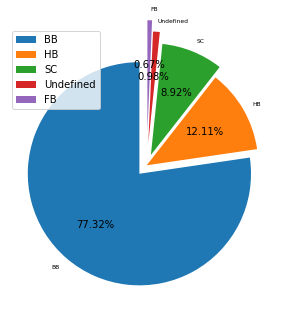

In [11]:
meal = ["BB", "HB", "SC", "Undefined", "FB"]
values = df.meal.value_counts()

plt.figure(figsize = (5, 7))
plt.pie(values, labels = meal, explode = (0.1, 0, 0.1, 0.2, 0.3), autopct = "%.2f%%",startangle = 90)

plt.legend()

plt.show();

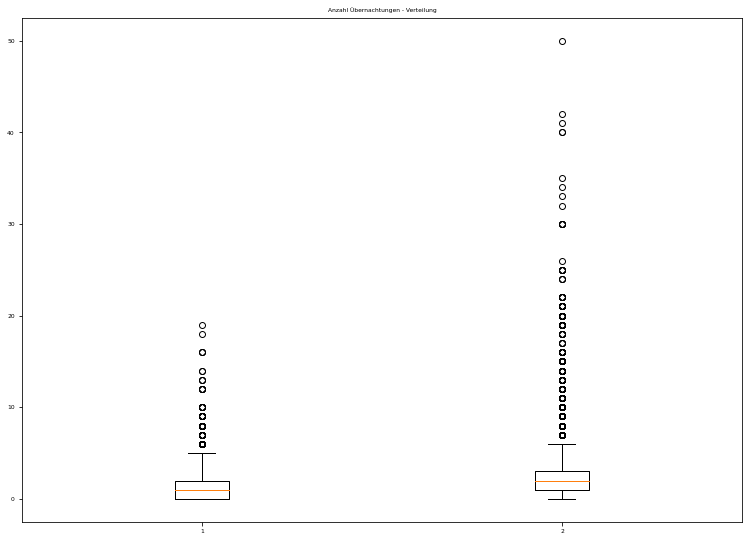

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64 2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
25        6
18        6
30        5
17        4
24        3
40        2
33        1
42        1
50        1
32        1
26        1
34        1
35        1
41        1
Name: stays_in_week_nights, dtype: int64


In [12]:
stays_weekend = df['stays_in_weekend_nights']
stays_week = df['stays_in_week_nights']
stays = [stays_weekend,stays_week]


fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0,1,1])

# Creating plot
bp = ax.boxplot(stays)

# Adding title
plt.title("Anzahl Übernachtungen - Verteilung")

# show plot
plt.show()
stays_num_weekend = df.stays_in_weekend_nights.value_counts()
stays_num_week = df.stays_in_week_nights.value_counts()
print(stays_num_weekend,stays_num_week) 


This figure shows the average price per room, depending on its type and the standard deviation. Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

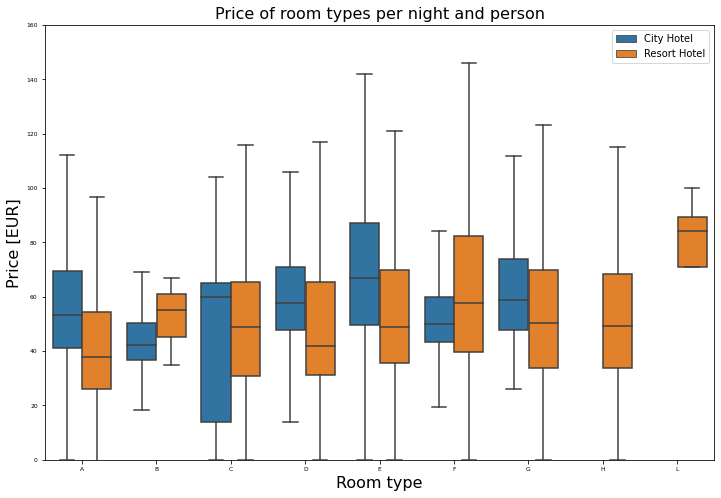

In [13]:
# normalize price per night (adr):
df["adr_pp"] = df["adr"] / (df["adults"] + df["children"])
full_data_guests = df.loc[df["is_canceled"] == 0] # only actual gusts
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here). The price of the city hotel varies less and is most expensive during spring and autumn.

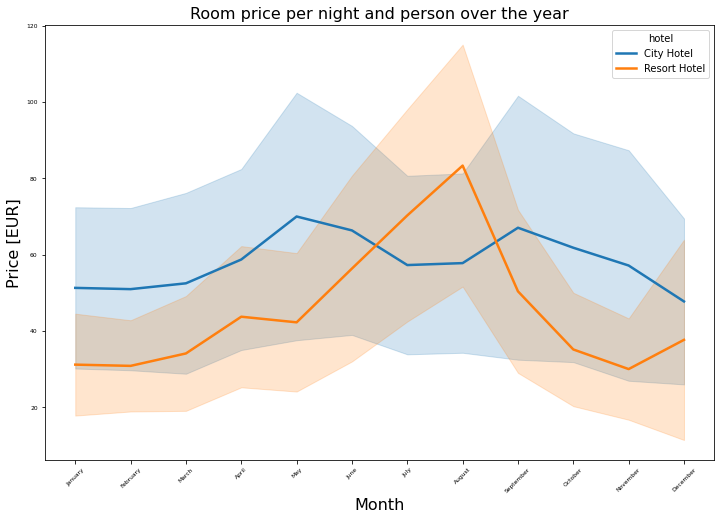

In [14]:
# grab data:
room_prices_mothly = full_data_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

In [15]:
#Data Frame month 
res_book_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data_month = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data_month = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data_month = pd.concat([res_cancel_data_month, cty_cancel_data_month], ignore_index=True)
full_cancel_data_month["cancel_percent"] = round(full_cancel_data_month["Cancelations"] / full_cancel_data_month["Bookings"] * 100,ndigits=1)


# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_data_month["Month"] = pd.Categorical(full_cancel_data_month["Month"], categories=ordered_months, ordered=True)


# Dataframe Year
res_book_per_year = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_year")["hotel"].count()
res_cancel_per_year = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_year")["is_canceled"].sum()

cty_book_per_year = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_year")["hotel"].count()
cty_cancel_per_year = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_year")["is_canceled"].sum()

res_cancel_data_year = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Year": list(res_book_per_year.index),
                                "Bookings": list(res_book_per_year.values),
                                "Cancelations": list(res_cancel_per_year.values)})
cty_cancel_data_year = pd.DataFrame({"Hotel": "City Hotel",
                                "Year": list(cty_book_per_year.index),
                                "Bookings": list(cty_book_per_year.values),
                                "Cancelations": list(cty_cancel_per_year.values)})

full_cancel_data_year = pd.concat([res_cancel_data_year, cty_cancel_data_year], ignore_index=True)
full_cancel_data_year["cancel_percent"] = round(full_cancel_data_year["Cancelations"] / full_cancel_data_year["Bookings"] * 100,ndigits=0)

#data_farme_year_month
def month_converter(month):
    months = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
    return months.index(month) + 1
df['arrival_month'] = df['arrival_date_month'].apply(month_converter)
df['arrival_year_month'] = df['arrival_date_year'].astype(str) + " _ " + df['arrival_month'].astype(str)

# Dataframe Year
res_book_per_year_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_year_month")["hotel"].count()
res_cancel_per_year_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_year_month")["is_canceled"].sum()

cty_book_per_year_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_year_month")["hotel"].count()
cty_cancel_per_year_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_year_month")["is_canceled"].sum()

res_cancel_data_year_month = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Year_Month": list(res_book_per_year_month.index),
                                "Bookings": list(res_book_per_year_month.values),
                                "Cancelations": list(res_cancel_per_year_month.values)})
cty_cancel_data_year_month = pd.DataFrame({"Hotel": "City Hotel",
                                "Year_Month": list(cty_book_per_year_month.index),
                                "Bookings": list(cty_book_per_year_month.values),
                                "Cancelations": list(cty_cancel_per_year_month.values)})

full_cancel_data_year_month = pd.concat([res_cancel_data_year_month, cty_cancel_data_year_month], ignore_index=True)
full_cancel_data_year_month["cancel_percent"] = round(full_cancel_data_year_month["Cancelations"] / full_cancel_data_year_month["Bookings"] * 100,ndigits=1)


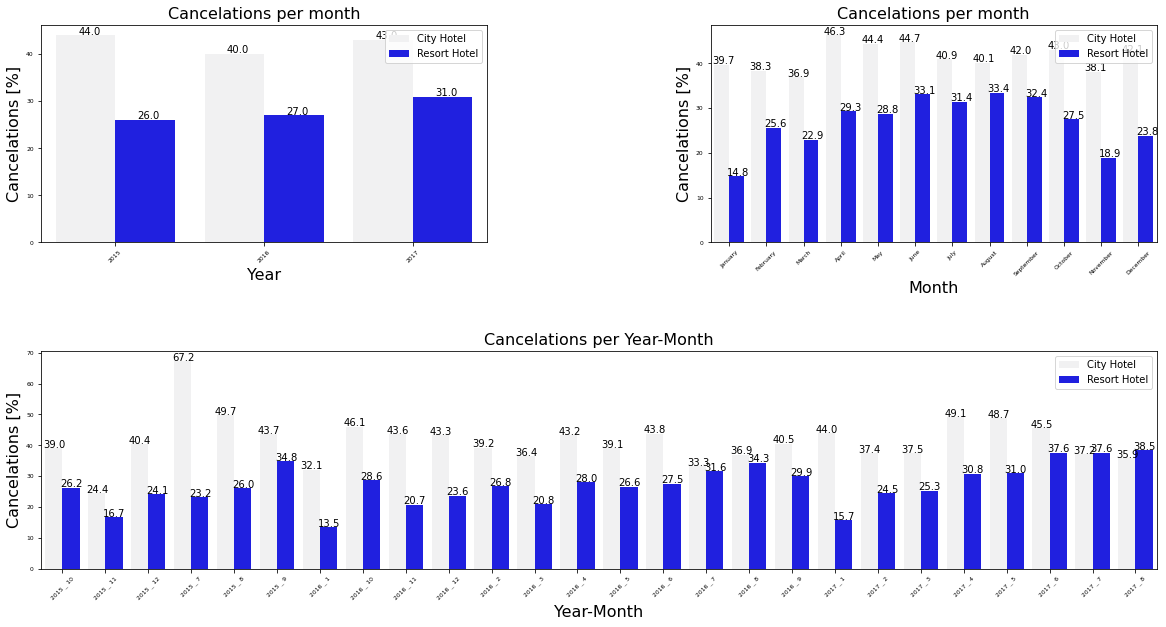

In [16]:
fig = plt.figure(figsize=(20, 10))

plt.subplots_adjust(wspace= 0.5, hspace= 0.5)

sub1 = fig.add_subplot(2,2,1) # two rows, two columns, fist cell
ax_1 = sns.barplot(x = "Year", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data_year, color='blue')
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
#plt.show()
for p in ax_1.patches:
    ax_1.annotate((p.get_height()),(p.get_x()+0.15, p.get_height()+0.2))

# Create second axes, the top-left plot with orange plot
sub2 = fig.add_subplot(2,2,2) # two rows, two columns, second cell
ax_2 = sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data_month, color='blue')
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
#plt.show()
for p in ax_2.patches:
    ax_2.annotate((p.get_height()),(p.get_x()-0.05, p.get_height()+0.2))

# Create third axes, a combination of third and fourth cell
sub3 = fig.add_subplot(2,2,(3,4)) # two rows, two colums, combined third and fourth cell
ax_3 = sns.barplot(x = "Year_Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data_year_month, color='blue')
plt.title("Cancelations per Year-Month", fontsize=16)
plt.xlabel("Year-Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
#plt.show()
for p in ax_3.patches:
    ax_3.annotate((p.get_height()),(p.get_x()-0.05, p.get_height()+0.2))

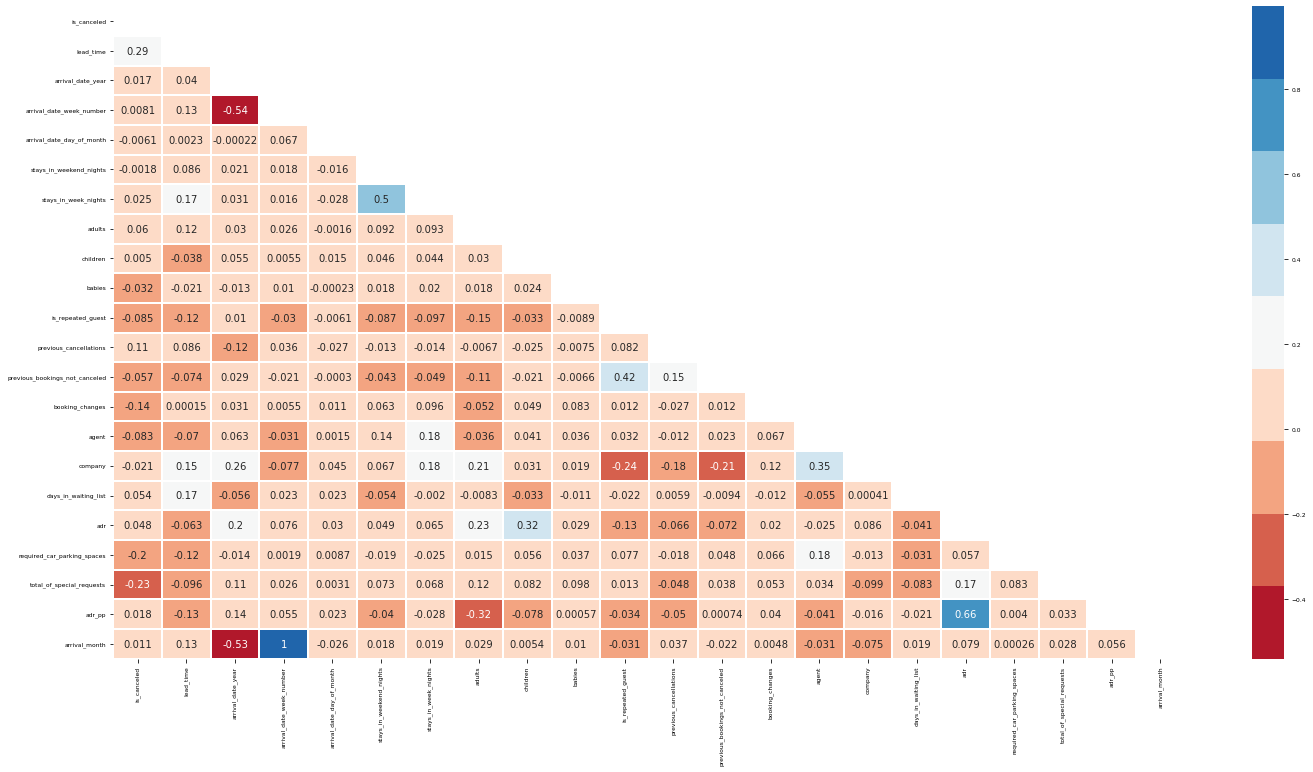

In [17]:
##col = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize = (24, 12))

corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)

mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            annot = True, 
            linewidths = 2,
            mask = mask,
            cmap=col)
plt.show()

<hr style="border:1px solid gray">

## 3. Datenbereinigung <a name="Cleaning"></a>

Replace missing values:
agent: If no agency is given, booking was most likely made without one.
company: If none given, it was most likely private.

In [18]:
replace_isnull =  {"children:": 0.0,"country": "Unspecified", "agent": 0, "company": 0}
df_clean = df.fillna(replace_isnull)


In [19]:
guests = df[['adults', 'children', 'babies']]
no_adults = guests.loc[(df['adults'] == 0.0)]
no_guests = guests.loc[(df['adults'] == 0.0) & (df['children'] == 0.0) & (df['babies'] == 0.0)]
only_children = guests.loc[(df['adults'] == 0.0) & (df['children'] != 0.0)]
only_babies = guests.loc[(df['adults'] == 0.0) & (df['children'] == 0.0) & (df['babies'] != 0.0)]
                           
print("Einträge ohne Erwachsene: ", len(no_adults))
print("Einträge nur Kinder: ", len(only_children))
print("Einträge nur Babies: ", len(only_babies))
print("--------------------------------")
print("Einträge ohne Anzahl Gäste: ", len(no_guests))

Einträge ohne Erwachsene:  403
Einträge nur Kinder:  223
Einträge nur Babies:  0
--------------------------------
Einträge ohne Anzahl Gäste:  180


In [20]:
no_guests_list = list(df_clean.loc[
                    df_clean["adults"]
                  + df_clean["children"]
                  + df_clean["babies"]==0].index)
df_clean.drop(df_clean.index[no_guests_list], inplace=True)

In [21]:
print("Anzahl gelöschter Zeilen aufgrund fehlender Anzahl Gäste: ",len(df)-len(df_clean))

Anzahl gelöschter Zeilen aufgrund fehlender Anzahl Gäste:  180


In [22]:
print("df: ",df.shape)
print("df_clean: ",df_clean.shape)

df:  (119390, 35)
df_clean:  (119210, 35)


Add_row_total_guests (just adults and children)

In [23]:
df_clean['total_guests'] = df_clean.loc[:,['adults','children']].sum(axis=1)

In [24]:
Unique_Meal = pd.unique(df['meal'])
print("Verpflegung (Ursprünglicher Datensatz): ",Unique_Meal)

Verpflegung (Ursprünglicher Datensatz):  ['BB' 'FB' 'HB' 'SC' 'Undefined']


"meal" contains values "Undefined", which is equal to SC.

In [25]:
# "meal" contains values "Undefined", which is equal to SC.
df_clean["meal"].replace("Undefined", "SC", inplace=True)

In [26]:
Unique_Meal_clean = pd.unique(df_clean['meal'])
print("Verpflegung (Angepasster Datensatz): ",Unique_Meal_clean)

Verpflegung (Angepasster Datensatz):  ['BB' 'FB' 'HB' 'SC']


- SC: Self Catering

- BB: Bed & Breakfast

- HB: Half Board (Breakfast and Dinner normally)

- FB: Full Board (Beakfast, Lunch and Dinner)

In [27]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [28]:
df_clean['meal'].value_counts()

BB    92236
HB    14458
SC    11718
FB      798
Name: meal, dtype: int64

In [29]:
cols_date=['arrival_date_year','arrival_date_month','arrival_date_day_of_month']
df_clean['arrival_date'] = df_clean[cols_date].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df_clean['arrival_date']=pd.to_datetime(df_clean['arrival_date'])

In [30]:
df_clean['nights_total'] = df_clean.loc[:,['stays_in_week_nights','stays_in_weekend_nights']].sum(axis=1)
nights_total = df_clean['nights_total'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
#Datetime objects and timedeltas can be added:

df_clean['departure_date'] = df_clean['arrival_date'] + nights_total

In [31]:
df_clean['nights_total'].value_counts()

2     27632
3     27064
1     21005
4     17373
7      8648
5      7771
6      3846
8      1155
10     1135
14      913
9       840
0       645
11      393
12      220
13      141
15       72
21       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
22       13
29       13
30       13
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
38        1
48        1
46        1
45        1
69        1
60        1
34        1
Name: nights_total, dtype: int64

In [32]:
df_clean = df_clean[df_clean['nights_total'] != 0]

In [33]:
df_clean['nights_total'].value_counts()

2     27632
3     27064
1     21005
4     17373
7      8648
5      7771
6      3846
8      1155
10     1135
14      913
9       840
11      393
12      220
13      141
15       72
21       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
22       13
29       13
30       13
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
38        1
48        1
46        1
45        1
69        1
60        1
34        1
Name: nights_total, dtype: int64

In [34]:
df_clean.shape

(118565, 39)

In [35]:
# Observe the result
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118565 non-null  object        
 1   is_canceled                     118565 non-null  int64         
 2   lead_time                       118565 non-null  int64         
 3   arrival_date_year               118565 non-null  int64         
 4   arrival_date_month              118565 non-null  object        
 5   arrival_date_week_number        118565 non-null  int64         
 6   arrival_date_day_of_month       118565 non-null  int64         
 7   stays_in_weekend_nights         118565 non-null  int64         
 8   stays_in_week_nights            118565 non-null  int64         
 9   adults                          118565 non-null  int64         
 10  children                        118561 non-null  float64

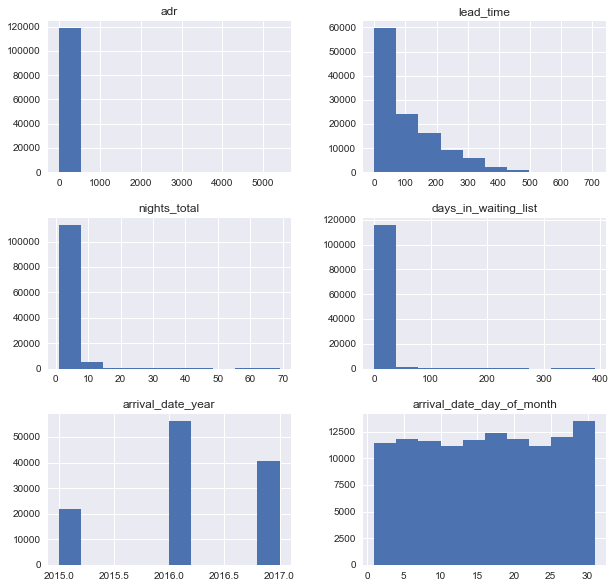

In [36]:
plt.style.use(['seaborn'])
hist = df_clean.hist(["adr","lead_time","nights_total","days_in_waiting_list","arrival_date_year","arrival_date_day_of_month"], figsize=(10,10))

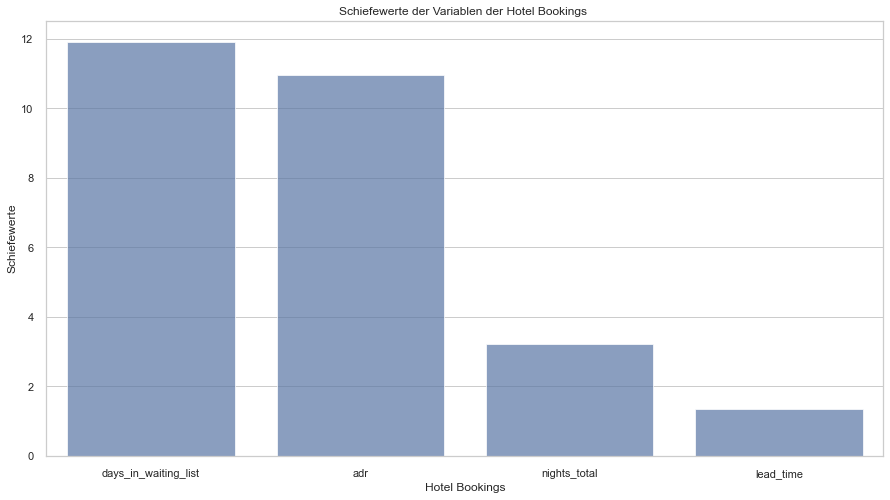

In [37]:
bookings_skewness = df_clean[["adr","lead_time","nights_total","days_in_waiting_list"]].skew().sort_values(ascending=False)

plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.barplot(x = list(bookings_skewness.index), y = bookings_skewness.values, 
            color = sns.color_palette()[0], alpha=.7)
plt.ylabel('Schiefewerte')
plt.xlabel('Hotel Bookings')
plt.title('Schiefewerte der Variablen der Hotel Bookings ')

plt.show()

Text(0.5, 1.0, 'Hotel Bookings - Verteilung adr')

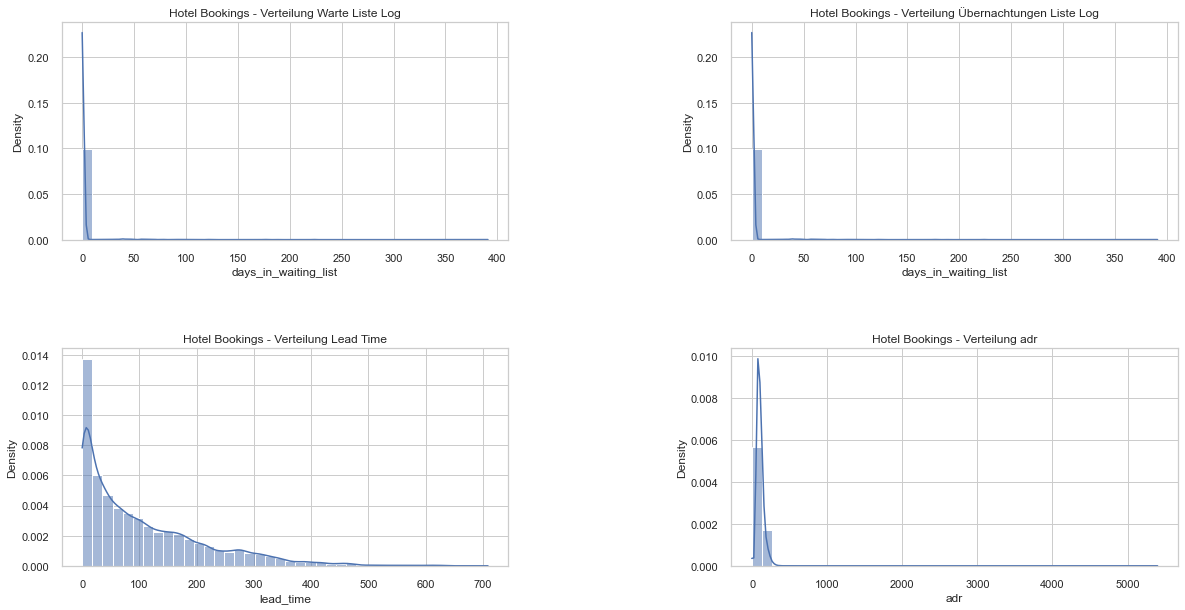

In [38]:
fig = plt.figure(figsize=(20, 10))

plt.subplots_adjust(wspace= 0.5, hspace= 0.5)

sub4 = fig.add_subplot(2,2,1) # two rows, two columns, fist cell
max_days_in_waiting_list= round(df_clean['days_in_waiting_list'].max(), 1)
text = f"Max. Wert: {max_days_in_waiting_list}"
text_kwargs = dict(ha='center', va='center')

ax_4 = sns.histplot(df_clean['days_in_waiting_list'], kde = True, stat = 'density', bins = 40)
plt.title("Hotel Bookings - Verteilung Warte Liste Log")


sub5 = fig.add_subplot(2,2,2) # two rows, two columns, fist cell
max_nights_total= round(df_clean['nights_total'].max(), 1)
text = f"Max. Wert: {max_nights_total}"
text_kwargs = dict(ha='center', va='center')

ax_5 = sns.histplot(df_clean['days_in_waiting_list'], kde = True, stat = 'density', bins = 40)
plt.title("Hotel Bookings - Verteilung Übernachtungen Liste Log")

sub6 = fig.add_subplot(2,2,3) # two rows, two columns, fist cell
max_lead_total= round(df_clean['lead_time'].max(), 1)
text = f"Max. Wert: {max_lead_total}"
text_kwargs = dict(ha='center', va='center')

ax_6 = sns.histplot(df_clean['lead_time'], kde = True, stat = 'density', bins = 40)
plt.title("Hotel Bookings - Verteilung Lead Time")

sub7 = fig.add_subplot(2,2,4) # two rows, two columns, fist cell
max_adr= round(df_clean['adr'].max(), 1)
text = f"Max. Wert: {max_adr}"
text_kwargs = dict(ha='center', va='center')

ax_7 = sns.histplot(df_clean['adr'], kde = True, stat = 'density', bins = 40)
plt.title("Hotel Bookings - Verteilung adr")


Text(0.5, 1.0, 'Hotel Bookings - Verteilung adr Log')

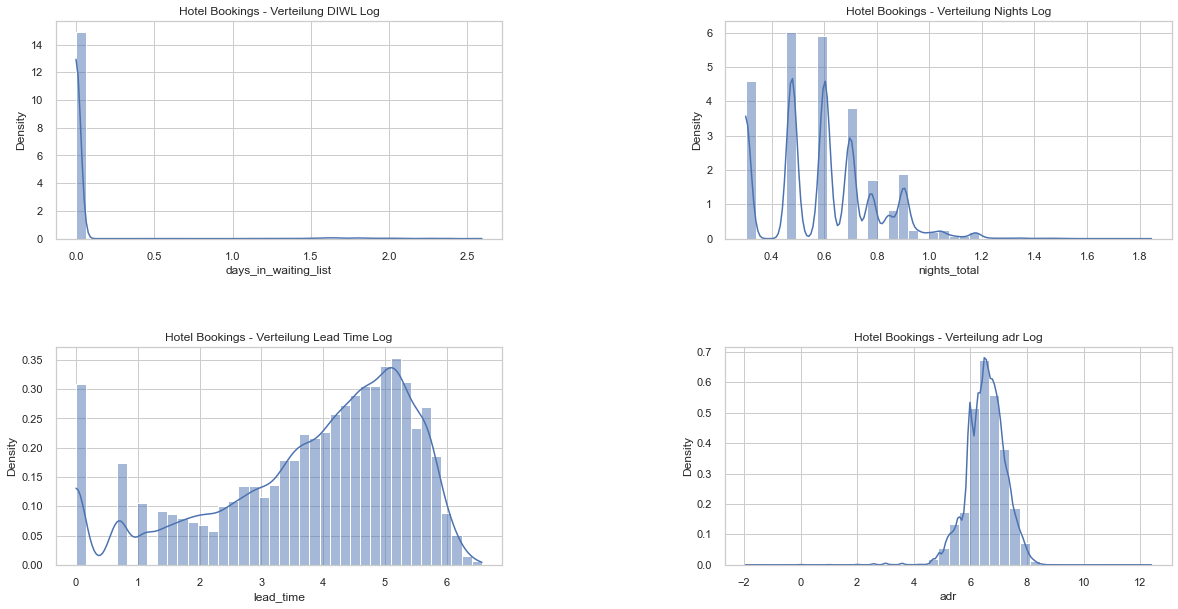

In [39]:
fig = plt.figure(figsize=(20, 10))

plt.subplots_adjust(wspace= 0.5, hspace= 0.5)

sub8 = fig.add_subplot(2,2,1) # two rows, two columns, fist cell
df_clean['days_in_waiting_list'] += 1
df_clean['days_in_waiting_list'] = np.log10(df_clean['days_in_waiting_list'])
diwl_log_score = df_clean['days_in_waiting_list'].skew()

diwl_log_score_2 = round(diwl_log_score, 2)
text = f"Neuer Skew Wert: {diwl_log_score_2}"

ax_8 = sns.histplot(df_clean['days_in_waiting_list'], kde = True, stat = 'density', bins = 40)
plt.title("Hotel Bookings - Verteilung DIWL Log")


sub9 = fig.add_subplot(2,2,2) # two rows, two columns, fist cell    
df_clean['nights_total'] +=1
df_clean['nights_total'] = np.log10(df_clean['nights_total'])
nights_log_score = df_clean['nights_total'].skew()

nights_log_score_2 = round(nights_log_score, 2)
text = f"Neuer Skew Wert: {nights_log_score_2}"

ax_9 = sns.histplot(df_clean['nights_total'], kde = True, stat = 'density', bins = 40)
plt.title("Hotel Bookings - Verteilung Nights Log")
    
sub10 = fig.add_subplot(2,2,3) # two rows, two columns, fist cell  
df_clean['lead_time'] +=1
df_clean['lead_time'] = np.log(df_clean['lead_time'])
lead_log_score = df_clean['lead_time'].skew()

lead_log_score_2 = round(diwl_log_score, 2)
text = f"Neuer Skew Wert: {diwl_log_score_2}"

ax_10 = sns.histplot(df_clean['lead_time'], kde = True, stat = 'density', bins = 40)
plt.title("Hotel Bookings - Verteilung Lead Time Log")


sub11 = fig.add_subplot(2,2,4) # two rows, two columns, fist cell 
df_clean = df_clean[(df_clean["adr"] != 0)]
df_clean = df_clean[(df_clean["adr"] > 0)]
df_clean['adr'] = np.log2(df_clean['adr'])
adr_log_score = df_clean['adr'].skew()
   
adr_log_score_2 = round(adr_log_score, 2)
text = f"Neuer Skew Wert: {adr_log_score_2}"

ax_11 = sns.histplot(df_clean['adr'], kde = True, stat = 'density', bins = 40)
plt.title("Hotel Bookings - Verteilung adr Log")


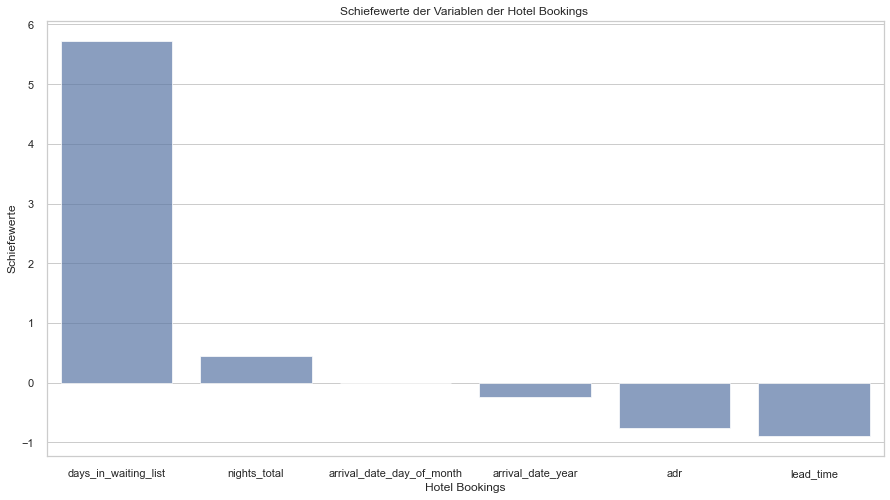

In [40]:
bookings_skewness = df_clean[["adr","lead_time","nights_total","days_in_waiting_list","arrival_date_year","arrival_date_day_of_month"]].skew().sort_values(ascending=False)

plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.barplot(x = list(bookings_skewness.index), y = bookings_skewness.values, 
            color = sns.color_palette()[0], alpha=.7)
plt.ylabel('Schiefewerte')
plt.xlabel('Hotel Bookings')
plt.title('Schiefewerte der Variablen der Hotel Bookings ')

plt.show()

In [41]:
df_explode=df_clean
df_explode['dates_in_house'] = [pd.date_range(s, e, freq='d') for s, e in
              zip(pd.to_datetime(df_clean['arrival_date']),
                  pd.to_datetime(df_clean['departure_date']))]

df_explode = df_clean.explode('dates_in_house').drop(['arrival_date','departure_date'], axis=1)
df_explode= df_explode[df_explode['nights_total'] != 0]


In [42]:
df_explode= df_explode[df_explode['nights_total'] != 0]
df_explode.shape

(523186, 38)

In [43]:
df_explode= df_explode[df_explode['is_canceled'] != 1]
df_explode.shape

(325403, 38)

In [44]:
df_explode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325403 entries, 2 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           325403 non-null  object        
 1   is_canceled                     325403 non-null  int64         
 2   lead_time                       325403 non-null  float64       
 3   arrival_date_year               325403 non-null  int64         
 4   arrival_date_month              325403 non-null  object        
 5   arrival_date_week_number        325403 non-null  int64         
 6   arrival_date_day_of_month       325403 non-null  int64         
 7   stays_in_weekend_nights         325403 non-null  int64         
 8   stays_in_week_nights            325403 non-null  int64         
 9   adults                          325403 non-null  int64         
 10  children                        325403 non-null  float64

In [45]:
rooms_per_day = df_explode.groupby(["dates_in_house"]).max()

test = df_explode.groupby(df_explode.hotel)['dates_in_house'].count()
test_top5 = test[:10]
print(test_top5)

hotel
City Hotel      178271
Resort Hotel    147132
Name: dates_in_house, dtype: int64


In [46]:
Rooms_Blocked_max_rh = df_explode.loc[(df_explode["hotel"] == "Resort Hotel")].groupby(['dates_in_house','hotel'])['dates_in_house'].count().sort_values(ascending=False).head(1)
Rooms_Blocked_max_ch = df_explode.loc[(df_explode["hotel"] == "City Hotel")].groupby(['dates_in_house','hotel'])['dates_in_house'].count().sort_values(ascending=False).head(1)
Rooms_Blocked_rh = df_explode.loc[(df_explode["hotel"] == "Resort Hotel")].groupby(['dates_in_house','hotel'])['dates_in_house'].count().sort_values(ascending=False).head(10)
Rooms_Blocked_ch = df_explode.loc[(df_explode["hotel"] == "City Hotel")].groupby(['dates_in_house','hotel'])['dates_in_house'].count().sort_values(ascending=False).head(10)

print("Maximum Zimmerbuchungen pro Hotel: ",Rooms_Blocked_max_rh,Rooms_Blocked_max_ch)
print("---------------------------------------------------------------------------------------")
print("Maximum Zimmerbuchungen Resort Hotel: ",Rooms_Blocked_rh)
print("---------------------------------------------------------------------------------------")
print("Maximum Zimmerbuchungen City Hotel: ",Rooms_Blocked_ch)

Maximum Zimmerbuchungen pro Hotel:  dates_in_house  hotel       
2017-05-25      Resort Hotel    276
Name: dates_in_house, dtype: int64 dates_in_house  hotel     
2016-06-26      City Hotel    349
Name: dates_in_house, dtype: int64
---------------------------------------------------------------------------------------
Maximum Zimmerbuchungen Resort Hotel:  dates_in_house  hotel       
2017-05-25      Resort Hotel    276
2017-04-29      Resort Hotel    276
2016-10-06      Resort Hotel    271
2016-10-20      Resort Hotel    255
2016-05-12      Resort Hotel    253
2016-09-15      Resort Hotel    251
2016-10-09      Resort Hotel    251
2016-05-02      Resort Hotel    250
2016-03-24      Resort Hotel    248
2015-10-19      Resort Hotel    242
Name: dates_in_house, dtype: int64
---------------------------------------------------------------------------------------
Maximum Zimmerbuchungen City Hotel:  dates_in_house  hotel     
2016-06-26      City Hotel    349
2016-06-24      City Hotel    3

In [48]:
df_explode.loc[:,['dates_in_house', 'arrival_date_month','stays_in_weekend_nights','stays_in_week_nights','total_guests']].head(5)

,dates_in_house,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,total_guests
2,2015-07-01,July,0,1,1.0
2,2015-07-02,July,0,1,1.0
3,2015-07-01,July,0,1,1.0
3,2015-07-02,July,0,1,1.0
4,2015-07-01,July,0,2,2.0
4,2015-07-02,July,0,2,2.0
4,2015-07-03,July,0,2,2.0
5,2015-07-01,July,0,2,2.0
5,2015-07-02,July,0,2,2.0
5,2015-07-03,July,0,2,2.0


In [49]:
df_clean.loc[:,['arrival_date_year','arrival_date_month','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','total_guests']].head(5)

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_guests
2,2015,July,1,0,1,1.0
3,2015,July,1,0,1,1.0
4,2015,July,1,0,2,2.0
5,2015,July,1,0,2,2.0
6,2015,July,1,0,2,2.0
7,2015,July,1,0,2,2.0
8,2015,July,1,0,3,2.0
9,2015,July,1,0,3,2.0
10,2015,July,1,0,4,2.0
11,2015,July,1,0,4,2.0


In [50]:
rh = df_clean.loc[(df_clean["hotel"] == "Resort Hotel")]
ch = df_clean.loc[(df_clean["hotel"] == "City Hotel")]

In [51]:
# After cleaning, separate Resort and City hotel
# To know the acutal visitor numbers, only bookings that were not canceled are included. 
df_clean_wo_cancel = df_clean.loc[(df_clean["is_canceled"] == 0)]
rh_wo_cancel = df_clean.loc[(df_clean["hotel"] == "Resort Hotel") & (df_clean["is_canceled"] == 0)]
ch_wo_cancel = df_clean.loc[(df_clean["hotel"] == "City Hotel") & (df_clean["is_canceled"] == 0)]

In [52]:
print("Shape df_clean: ", df_clean.shape)
print("Shape df_clean_wo_cancel: ", df_clean_wo_cancel.shape)
print("Shape rh: ", rh_wo_cancel.shape)
print("Shape ch: ", ch_wo_cancel.shape)

Shape df_clean:  (117399, 40)
Shape df_clean_wo_cancel:  (73388, 40)
Shape rh:  (28269, 40)
Shape ch:  (45119, 40)


In [53]:
df_clean['arrival_month'] = df_clean['arrival_date_month'].apply(month_converter)
df_clean['arrival_year_month'] = df_clean['arrival_date_year'].astype(str) + " _ " + df_clean['arrival_month'].astype(str)


df_explode['arrival_month'] = df_explode['arrival_date_month'].apply(month_converter)
df_explode['arrival_year_month'] = df_explode['arrival_date_year'].astype(str) + " _ " + df_explode['arrival_month'].astype(str)

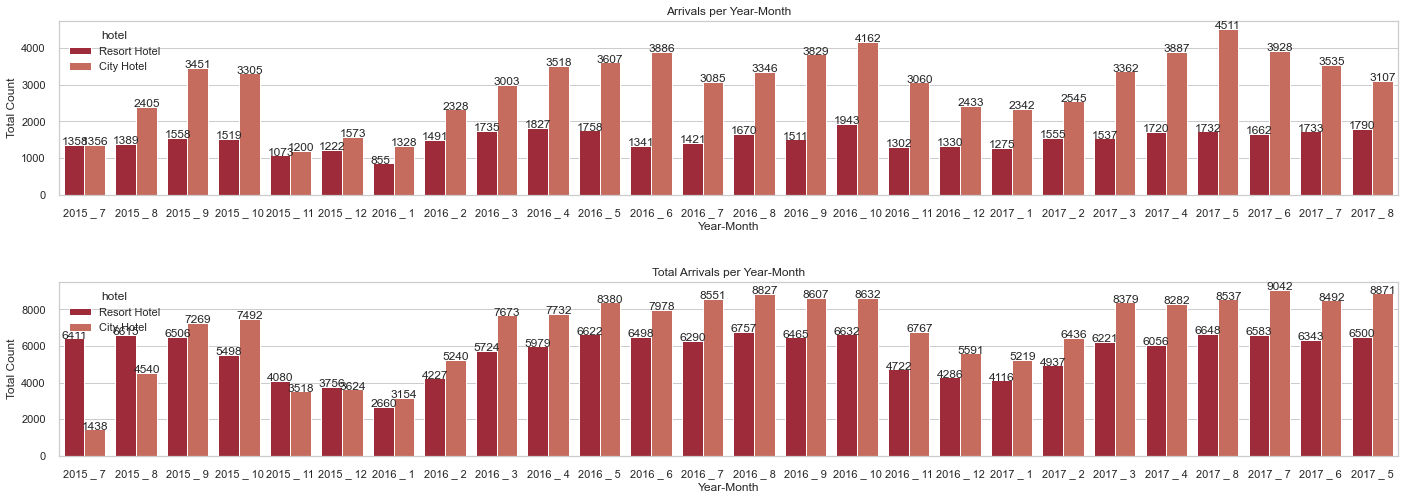

In [54]:
fig = plt.figure(figsize=(24, 8))

plt.subplots_adjust(wspace= 0.5, hspace= 0.5)

sub12 = fig.add_subplot(2,1,1) # two rows, one columns, fist cell
ax_12 = sns.countplot(x='arrival_year_month',hue='hotel', data = df_clean, palette=col)
plt.title('Arrivals per Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Count')
for p in ax_12.patches:
    ax_12.annotate((p.get_height()),(p.get_x()-0.05 , p.get_height()+1)) 

sub13 = fig.add_subplot(2,1,2)
ax_13 = sns.countplot(x='arrival_year_month',hue='hotel', data = df_explode, palette=col)
plt.title('Total Arrivals per Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Count')
for p in ax_13.patches:
    ax_13.annotate((p.get_height()),(p.get_x()-0.05 , p.get_height()+1)) 

In [55]:
counter = df_clean.groupby('arrival_year_month')['hotel'].value_counts().unstack()
#calculate the % for each age group 
percentage_dist = 100 * counter.divide(counter.sum(axis = 1), axis = 0)


ax = percentage_dist.plot(kind='bar', stacked=True, color=base_color)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

NameError: name 'base_color' is not defined

In [ ]:
base_color = sns.color_palette()
df_plot = df_clean.groupby(['hotel', 'arrival_year_month']).size().reset_index().pivot(columns='hotel', index='arrival_year_month', values=0)
counter = df_clean.groupby('arrival_year_month')['hotel'].value_counts().unstack()
percentage_dist = 100 * counter.divide(counter.sum(axis = 1), axis = 0)

ax = df_plot.plot(kind='bar', stacked=True, color=base_color)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} '.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

In [ ]:
country_data = pd.DataFrame(df_clean.loc[df_clean["is_canceled"] == 0]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Number of Guests"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Blues,
                    title="Home country of guests")
guest_map.show()

In [ ]:
# get number of acutal guests by country
country_data = pd.DataFrame(df_clean.loc[df_clean["is_canceled"] == 0]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
#country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [ ]:
cancel_corr_rh = rh.corr()["is_canceled"]
cancel_corr_rh_list = cancel_corr_rh.abs().sort_values(ascending=False)[1:]
cancel_corr_rh_top5 = cancel_corr_rh_list[:5]
print(cancel_corr_rh_top5)

In [ ]:
cancel_corr_ch = ch.corr()["is_canceled"]
cancel_corr_ch_list = cancel_corr_ch.abs().sort_values(ascending=False)[1:]
cancel_corr_ch_top5 = cancel_corr_ch_list[:5]
print(cancel_corr_ch_top5)

In [ ]:
# group data for lead_time:
lead_cancel_data = df_clean.groupby("lead_time")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

<hr style="border:1px solid gray">

## 4. Modellierung <a name="ML"></a>

In [ ]:
# create a new data set 
hotel_data = df_clean.copy()
# the replace dictionary uses a colon to indicate what is to be replaced and commas to separate the items
hotel_data['cancelled'] = hotel_data['is_canceled'].replace({0: 'No', 1: 'Yes'})


# display the slice
hotel_data

In [ ]:
# create a list for the target and define y
target = 'is_canceled'
y = hotel_data[target]

# create an array of all the input features and define the X
all_features=['lead_time', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'booking_changes', 'total_of_special_requests']
X_all=hotel_data[all_features]

# perform the training-testing split
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y, train_size=0.8, random_state=1)

# display the length of the lists to check
print("Size of X_all_train: ",X_all_train.shape)
print("Length of y_all_train: ",len(y_all_train))
print("Size of X_all_test: ",X_all_test.shape)
print("Length of y_all_test: ",len(y_all_test))

In [ ]:
# Define the input features
input_features=['lead_time']

# create the model
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_all_train[input_features], y_all_train)

# display the model
fig, ax = plt.subplots(figsize=(18,8))
plot_tree(tree_model, filled=True, impurity=False, feature_names=input_features, proportion=True, class_names=["No", "Yes"], ax=ax, fontsize=14);
plt.show()

# create a list of the predictions
y_pred = tree_model.predict(X_all_test[input_features])

# display the precision and recall
print("Precision: ",100*precision_score(y_all_test, y_pred))
print("Recall: ",100*recall_score(y_all_test, y_pred))

In [ ]:
# Define the input features
input_features=['lead_time','total_of_special_requests']

# create the model
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_all_train[input_features], y_all_train)

# display the model
fig, ax = plt.subplots(figsize=(18,8))
plot_tree(tree_model, filled=True, impurity=False, feature_names=input_features, proportion=True, class_names=["No", "Yes"], ax=ax, fontsize=14);
plt.show()

# create a list of the predictions
y_pred = tree_model.predict(X_all_test[input_features])

# display the precision and recall
print("Precision: ",100*precision_score(y_all_test, y_pred))
print("Recall: ",100*recall_score(y_all_test, y_pred))

In [ ]:
# Two-way table 
pd.crosstab(hotel_data['cancelled'], hotel_data['hotel'])

In [ ]:
sns.catplot(data=hotel_data, kind='violin', x='lead_time', y='hotel', hue='cancelled', split=True, aspect=2);

<hr style="border:1px solid gray">

In [ ]:
bookings = df_clean[df_clean['is_canceled']==0].pivot_table(index='arrival_date_month',columns='arrival_date_year', values='hotel', aggfunc=len, fill_value=0)

In [ ]:
bookings.index = pd.CategoricalIndex(bookings.index, categories=['January', 'February', 'March', 'April','May','June','July', 'August','September', 'October', 'November', 'December'], ordered=True)
bookings.index = pd.CategoricalIndex(bookings.index, categories=['January', 'February', 'March', 'April','May','June','July', 'August','September', 'October', 'November', 'December'], ordered=True)
bookings = bookings.sort_index()
mask = np.array([[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]])
f, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(bookings, center=2000, annot=True, mask=mask, fmt="d", ax=ax, cmap="YlGnBu")
sns.set_context('paper')
plt.show()

In [ ]:
df_clean['room_assignment'] = df_clean['reserved_room_type']==df_clean['assigned_room_type']
df_clean['bill']=df_clean.nights_total*df_clean.adr

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score

Prepare the inputs
To tackle the model traning part, we need to deal with categorical features, by replacing them with dummy columns. The features at hand are:
hotel, market_segment, distribution_channel, room_assignmnt, deposit_type, is_repeated_guest

In [ ]:
df_clean['arrival_date_month'] = df_clean['arrival_date_month'].replace(['July','August','September','October','November','December','January',
'February','March','April','May','June'],[7,8,9,10,11,12,1,2,3,4,5,6])b

In [ ]:
bookings = df_clean[['is_canceled', 'lead_time', 'country', 'hotel', 'market_segment', 'distribution_channel', 'room_assignment', 'deposit_type', 'customer_type', 'is_repeated_guest']]

In [ ]:
booking_data_dummies=pd.get_dummies(data=bookings, columns=['hotel', 'country', 'market_segment', 'distribution_channel', 'room_assignment', 'deposit_type', 'customer_type', 'is_repeated_guest'])
print(booking_data_dummies.shape)

Then, we need to split the dataframe into features (booking columns) and the label to predict ('is_canceled'). Next, we will split the dataframe into a training set (X_train and y_train) and a test set (X_test and y_test)

In [ ]:
X = booking_data_dummies.drop(['is_canceled'], axis=1).values
y = booking_data_dummies.is_canceled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

Prepare the model
By preparing the model, we mean choosing the algorithm, instantiating it and then fitting it to the training set. The algorithms that are suited for the problem at hand, which is a classification, are the following:

- Decision trees (CART)
- KNN (with confusion matrix)
- Logistic regression (with ROC)
- A boosted model with a combination of all the above.


**Decision Tree Classifier**

In [ ]:
model_t = DecisionTreeClassifier(criterion='entropy', random_state=7)
model_t.fit(X_train, y_train)
y_pred = model_t.predict(X_test)
print('Score :', accuracy_score(y_test, y_pred))b

With the use of GridSearchCV, it is clear that increasing the 'max_depth' parameter increases the model accuracy without finding an optimum. So the choice will be trade-off between execution time and score improvemen

**K-Nearest Neighbors**

In [ ]:
model_k = KNN(n_neighbors=4)
model_k.fit(X_train, y_train)
y_pred = model_k.predict(X_test)
print('Score :', accuracy_score(y_test, y_pred))

**Logistic Regression**

In [ ]:
model_l = LogisticRegression(random_state=7, solver='liblinear')
model_l.fit(X_train, y_train)
y_pred = model_l.predict(X_test)
print('Score :', accuracy_score(y_test, y_pred))

**Voting Classifier**

In [ ]:
classifiers = [('Logistic Regression', model_l),
('K Nearest Neighbours', model_k),
('Classification Tree', model_t)]
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

**Bagging Classifier**

In [ ]:
bc = BaggingClassifier(base_estimator=model_l, n_estimators=100)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

**Random Forest**

**Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=400, random_state=7)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print('Accuracy of Random Forest Classifier: {:.3f}'.format(accuracy))

So far, the best strategy to predict the outcomes of bookings was adaptive boosting on Decision trees, which yields a score as high as 85%. In real life, we wouldn't go the management comittee of the holtel chain to tell them that the model predicts the fulfillment of reservations 85% of the time, as this would mean nothing and everything. One obvious comment would be on the ability of the model to predict impact on revenues, aka bottom line numbers.

In [ ]:
booking_sample = df_clean.sample(4420).sort_values(by='bill', ascending=False)
booking_sample.bill.sum()
booking_sample_0 = booking_sample[booking_sample['is_canceled']==0].sort_values(by='bill', ascending=False).head(int(4420*0.113)).bill.sum()
booking_sample_1 = booking_sample[booking_sample['is_canceled']==1].sort_values(by='bill', ascending=False).head(int(4420*0.113)).bill.sum()
upper_bound = booking_sample.bill.sum() + booking_sample_0
lower_bound = booking_sample.bill.sum() - booking_sample_1
print('The actual month revenue if between %.2f and %.2f of the predicted sum.' %(upper_bound/booking_sample.bill.sum(), lower_bound/booking_sample.bill.sum()))

To recap we've just done, we took the mean count of bookings the hotels may get on a regular month. We supposed the worst case scenarios are the ones where the wrong predictions are on the reservations with the biggest bills.
Since the model is 88.7% accurate, we suppose that in one scenario we have the wrong predictions on 11% of the bookings that were actually canceled, this will give us false hope of redeeming the corresponding value (lower bound), and vice versa (scenario where we wrongly assume that the most important 11% of the bookings are going to be canceled, when in fact they will be fulfilled, thus offsetting the total revenue to the upper bound). In conclusion, our model of 88.7% accuracy only helps in predicting the revenue to a whopping +/- 25%. Further statistical significance testing is required (p-values) to determine whether the revenue prediction can be narrowed down to a smaller interval.

Another use of the prediction model would be to intentionally overbook the establishments in peak season, to compensate for the bookings to-be-canceled. Given that cancellation rates have a mean of 40% in peak months, we can use this rate to overbook, whenever the predicted fulfilled bookings reach nominal hotel capacity. To adjust for the error of the model, we suppose that 11.3% of the bookings predicted to-be-canceled are going to turn up at the hotel counter once the reserved date comes, and deduct the number from the overbooked capacity.

In [ ]:
print('* All in all, a rough calculation to optimally overbook the establishment at peak seasons is', int(88.7/0.6),'%')

<hr style="border:1px solid gray">

## 5. Modelloptimierungen und Vergleiche der Modelle <a name="Optimization"></a>

<hr style="border:1px solid gray">

## 6. Ergebnispräsentation <a name="Present"></a>

<hr style="border:1px solid gray">

## 7. Zusammenfassung und Ausblick <a name="Summary"></a>